### Pre processamento

In [1]:
import pandas as pd

df = pd.read_csv('movies.csv',',')

#Renomeando as colunas para o portugues
df.columns = ['filme_id','titulo','generos']
df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Categorizando os gêneros com numpy -- Variáveis Dummy

In [2]:
generos = df.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df = pd.concat([df, generos], axis=1)
df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Reescalando os gêneros

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados.shape

(9742, 20)

#### Agrupando os gêneros

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(generos_escalados)
print(f'Grupos {model.labels_}')

Grupos [2 2 0 ... 1 2 0]


#### Plotando os grupo, para fazer analise

In [6]:
print(generos.columns)
print(model.cluster_centers_) #Centros de cada grupo

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.28426731 -0.23248836 -0.24325645 -0.16022968  0.95841281
  -0.15349205 -0.16732888 -0.13589606 -0.14611575 -0.09208656 -0.21940327
  -0.11993903  0.06258844 -0.20230779  0.56406139 -0.21011915 -0.46088823
  -0.08918142 -0.03123743]
 [ 0.0569391   0.15082151 -0.1089376  -0.24621851 -0.25047149 -0.72674482
   0.18081497  0.1675497   0.23671736 -0.18045514  0.08919038  0.21618386
  -0.04707713 -0.11536379  0.1780302  -0.36753703  0.0994648   0.43143396
   0.1020176   0.04327413]
 [-0.05917995  0.30539013  1.36622614  2.06507945  1.78459908  0.01935182
  -0.3127513  -0.19884311 -0.64521479  1.39691883 -0.09492563 -0.24385963
   0.6609774   0.32763802 -0.12243909 -0.27785528  0.28348825 -0.40319853
 

### Adicionar os valores dos grupos em um DataFrame, para facilitar na hora de plotar um gráfico

In [7]:
grupos = pd.DataFrame(model.cluster_centers_,
                      columns=generos.columns)
grupos.transpose()

,0,1,2
(no genres listed),-0.059180,0.056939,-0.059180
Action,-0.284267,0.150822,0.305390
Adventure,-0.232488,-0.108938,1.366226
Animation,-0.243256,-0.246219,2.065079
Children,-0.160230,-0.250471,1.784599
Comedy,0.958413,-0.726745,0.019352
Crime,-0.153492,0.180815,-0.312751
Documentary,-0.167329,0.167550,-0.198843
Drama,-0.135896,0.236717,-0.645215
Fantasy,-0.146116,-0.180455,1.396919


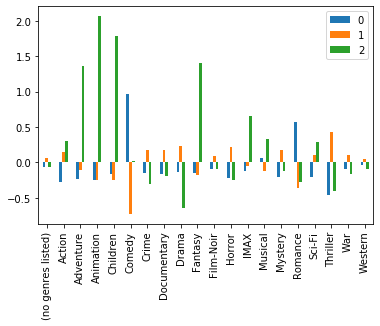

In [9]:
grupos.transpose().plot.bar()